In [1]:
import click
from pathlib import Path
from typing import Tuple
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import deeperase
import os

2022-10-28 05:10:23.121082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 05:10:23.223312: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-28 05:10:23.631915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-28 05:10:23.631954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
tf.executing_eagerly()

True

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

2022-10-28 05:10:24.224090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 05:10:24.269564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:24.285731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:24.285961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [4]:
tf.config.get_visible_devices()

2022-10-28 05:10:26.273939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:26.274583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:26.275060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
input_pattern = "/home/victor-cimat/tesis/DeepEraser/mis_datos/images/*.jpg"
target_pattern = "/home/victor-cimat/tesis/DeepEraser/mis_datos/labels/*.jpg"

image_size = (64, 256)

train_ds, test_ds = deeperase.data.build_dataset(
    input_pattern, target_pattern, image_size=image_size,
    train_size = 0.8) 

2022-10-28 05:10:31.639262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:31.639447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:31.639548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:31.639682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:31.639784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [7]:
unet = deeperase.build_unet(input_shape= (64, 256,1), 
                            backbone = 'mobilenetv2', 
                            n_channels = 1,
                            use_batchnorm = True,
                            name = 'Mi_generador')

In [8]:
unet_optimizer = tf.optimizers.Adam(learning_rate=1e-1, beta_1=.2)

In [9]:
discriminator = deeperase.build_discriminator(input_shape= (64, 256,1),
                                              filters= 64,
                                              n_hidden= 2,
                                              name='Mi_discriminator')

In [10]:
discriminator_optimizer = tf.optimizers.Adam(learning_rate=2e-4, beta_1=.5)

In [11]:
modelo = deeperase.DeepErase(generator=unet, discriminator=discriminator)

In [12]:
modelo.build((None,) + (64, 256,1))
modelo.compile(optimizer=unet_optimizer, 
               discriminator_optimizer=discriminator_optimizer)

Epoch 1/2


2022-10-28 05:11:04.166871: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2022-10-28 05:11:04.516366: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


100/100 [==============================] - ETA: 0s - discriminator_loss: 0.1047 - generation_content_loss: 44822.7128 - generator_adversarial_loss: 0.8216

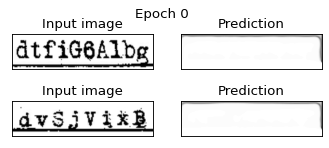

100/100 [==============================] - 40s 303ms/step - discriminator_loss: 0.1038 - generation_content_loss: 44541.8940 - generator_adversarial_loss: 0.8225
Epoch 2/2
100/100 [==============================] - ETA: 0s - discriminator_loss: 0.1022 - generation_content_loss: 16559.9047 - generator_adversarial_loss: 1.5841

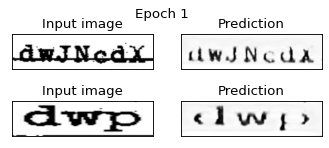

100/100 [==============================] - 30s 300ms/step - discriminator_loss: 0.1042 - generation_content_loss: 16550.1854 - generator_adversarial_loss: 1.5818


In [13]:
modelo.fit(train_ds.batch(64), 
          epochs=2, 
          callbacks=[deeperase.callbacks.MI_TensorBoard(logdir='/home/victor-cimat/tesis/DeepEraser/modelo-DE-W',
                                                     images_dataset=test_ds)])

In [ ]:
tf.summary.